In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [54]:
data = pd.read_csv('ISEAR_only_text_pt_data_augmentation.csv',sep=";")

# Get the label column
labels = data['sentiment']
label_counts = labels.value_counts()
colors = np.array([[100, 149, 237], [182, 208, 226], [135, 206, 235] ,[115, 147, 179], [173, 216, 230],  [204, 204, 255], [111, 143, 175]])
colors = (colors / 255)

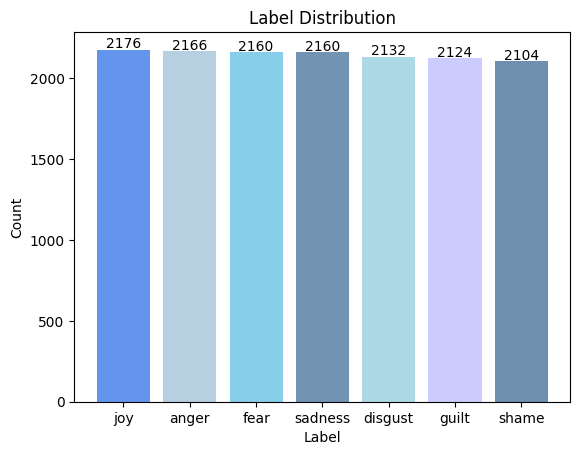

In [56]:
for i, v in enumerate(label_counts.values):
    plt.text(i, v+10, str(v), ha='center')
plt.bar(label_counts.index, label_counts.values,color=colors)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

In [5]:
val_losses = []
val_accuracies = []
train_losses = []
train_accuracies = []
with open('text.txt', 'r') as file: 
    for line in file:
        if line.find("Validation results") > 0:
            i = line.index("val_loss") + len("val_loss") + 1
            j = line.index(",")
            x = line.index("val_acc") + len("val_acc") + 1
            val_losses.append(float(line[i:j]))
            val_accuracies.append(float(line[x:]))       
        else:
            i = line.index("train_loss") + len("train_loss") + 1
            j = line.index(",")
            x = line.index("train_acc") + len("train_acc") + 1
            train_losses.append(float(line[i:j]))
            train_accuracies.append(float(line[x:]))      

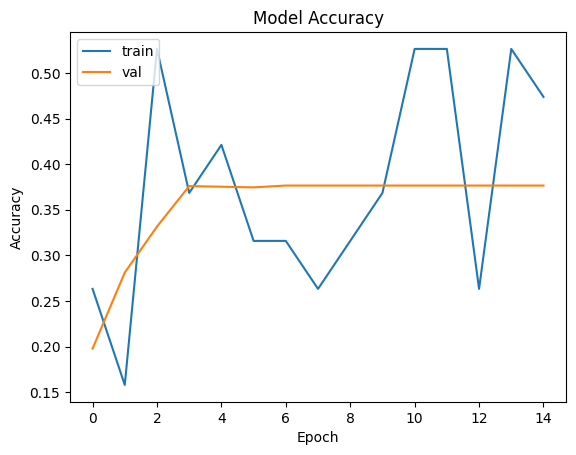

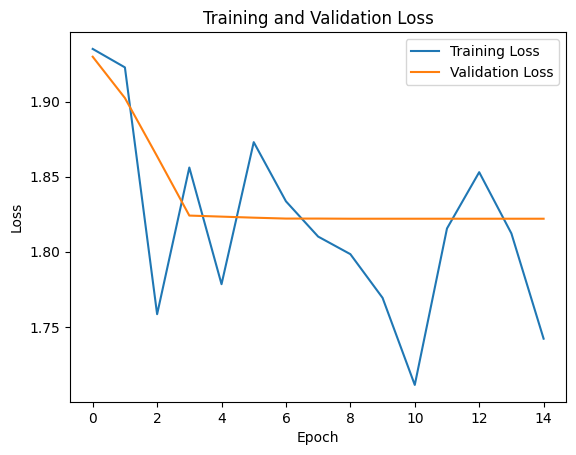

In [6]:
import matplotlib.pyplot as plt
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# Plot training and validation loss
fig, ax = plt.subplots()
ax.plot(train_losses, label='Training Loss')
ax.plot(val_losses, label='Validation Loss')
ax.set_title('Training and Validation Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.legend()
plt.show()